## Figure 2
### Calculate steady state phonon number for the three-level system coupled to a mechanical mode as a function of detunings: $\Delta_1$ and $\Delta_2$

In [9]:
# Import Libraries
import Phonon_Number as pn
import parameters as params

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import clear_output
from scipy.io import savemat, loadmat

In [2]:
'''
Import and define parameters
'''
# Import parameters
omega_21, temperature, g, pump, T2, T1, gamma = params.three_level_system_params()

N = 50                                                 # truncation for the phonon number basis in qutip

limit = 50                                             # in GHz
data_points = 20                                       # number of data points in delta1 and delta2 arrays
delta_1 = np.linspace(-limit, limit, data_points)      # in GHz
delta_2 = np.linspace(-limit, limit, data_points)      # in GHz

# initializing input arrays
detuning_plot = np.zeros((len(delta_1), len(delta_2)))

In [4]:
'''
Iterating over delta_1 and delta_2 to calculate simulation values
'''

for i in range(len(delta_2)):
    for j in range(len(delta_1)):
        
        # obtain values from simulations
        detuning_plot[i,j] = pn.detuning(delta_1[j], delta_2[i], omega_21, temperature, g, pump, T2, T1, gamma, N)
        
        # progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

clear_output()
print('Calculations done!')

Calculations done!


In [ ]:
'''
Save data as a dictionary into .mat file
'''

figure2 = {'delta_1' : delta_1,
           'delta_2' : delta_2,
           'data_points' : data_points,
           'omega_21' : omega_21,
           'temperature' : temperature,
           'g' : g,
           'pump' : pump,
           'T2' : T2,
           'T1' : T1,
           'gamma' : gamma,
           'N' : N,
           'detuning_plot' : detuning_plot
          }

savemat("./data files/figure2.mat", figure2) # saving data

In [ ]:
'''
Import data for plotting
'''

# import data file and define variables
figure2 = loadmat("./data files/detuning.mat")

detuning_plot = figure2['detuning_plot']

delta1 = figure2['delta1'][0]
delta2 = figure2['delta2'][0]

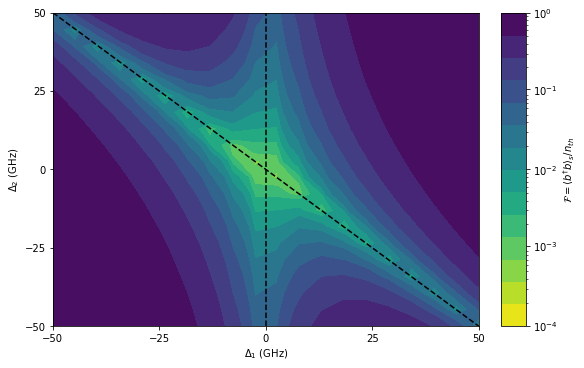

In [7]:
'''
Plotting
'''

# plot specifications
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)  # subplot grid
[X,Y] = np.meshgrid(delta_1, delta_2) # define X,Y for contour plot
levels = np.logspace(-4,0,15) # finetune gradation in contour plot
locator = ticker.LogLocator(base=10)
fig.add_subplot(spec[0, 0])

plt.contourf(X,Y, detuning_plot, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot

cbar = plt.colorbar(ticks=locator)
cbar.set_label(r'$\mathcal{F} = \langle b^{\dagger}b \rangle_s/n_{th}$')
plt.ylabel('$\Delta_2$ (GHz)')
plt.xlabel('$\Delta_1$ (GHz)')

# minimization of the phonon number happening for x = 0 line and y = -x line. Plotting these two.
plt.plot(delta_2, -delta_2, linestyle='--', color = 'k', linewidth = 1.5)
plt.axvline(x = 0, linestyle='--', color = 'k', linewidth = 1.5)       

plt.xticks([-50, -25, 0, 25, 50])
plt.yticks([-50, -25, 0, 25, 50])
plt.rcParams.update({'font.size': 20})

fig = plt.gcf()
fig.set_size_inches((8, 5), forward=False)

# fig.savefig('./figures/detuning.png', dpi= 300)
plt.show()